In [1]:
# import necessary libraries to run choppe and analyze its results

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# set the plot style

params= { 'font.family':'sans-serif',
            "font.weight":"bold",
                'xtick.labelsize':10,
                'ytick.labelsize':10
    }

matplotlib.rcParams.update(params)

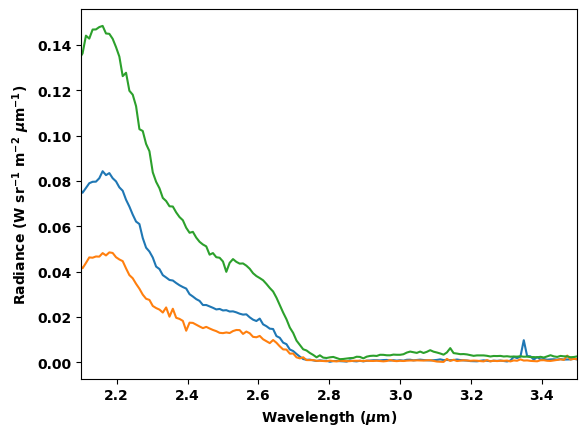

In [2]:
# read and store the input spectra

spectra_file=pd.read_csv("ganymede_20.txt",  header=None, sep='\s+', engine='python')
spectra=spectra_file.to_numpy()

wv=np.linspace(2, 3.5, len(spectra[0]))

for i in range(100,103):
    plt.plot(wv,spectra[i])
plt.xlim(2.1,3.5)
plt.xlabel(r"Wavelength ($\mu$m)", fontweight="bold")
plt.ylabel(r"Radiance (W sr$^{-1}$ m$^{-2}$ $\mu$m$^{-1}$)", fontweight="bold")
plt.show()

These are spectra of Ganymede collected by Juno/JIRAM during its PJ24 passage.

They are published in Mura et al. 2020 "Infrared Observations of Ganymede From the Jovian InfraRed Auroral Mapper on Juno"

They are also available at: https://pds-atmospheres.nmsu.edu/data_and_services/atmospheres_data/JUNO/jiram.html

If you wish to use them outside this example you are gently asked to contact the JIRAM PI Alessandro Mura at alessandro.mura@inaf.it

In [3]:
# import chopper

import chopper as chopper

In [4]:
# run chopper using the desired flags

# first let it run without any flag !

labels, clusters, coefficients, mean_spectra, mean_std= chopper.do_Clustering(input_spectra=spectra, flag_solar_correction=False, flag_PCA=False,
                                                      flag_GMM=False, flag_N_clusters=False)

#########################################################################
################## directly from the ghost crew...... ###################
#########################################################################

ˇ       --~~--_      ˇ 
|____/~/_|  |_\~\____|
    |____________|                    Welcome user :)
    |[][][][][][]|:=  .               I'm here to help you 
  __| __         |__ \  ' .          / with your collection of spectra !
 |  ||. |   ==   |  |  \    ' .     /  
(|  ||__|   ==   |  |)   \      '<
 |  |[] []  ==   |  |      \    '\|
 |  |____________|  |        \    |
 /__\     |_|    /__\          \ / \

#########################################################################
################# chopper.py v1 written by @astro-francy ################
#########################################################################

/~/_|  |_\~\ --- PCA step


/~/_|  |_\~\ --- Clustering step

Based on k-elbow method, a possible optimal number of clusters is: 4

/~/

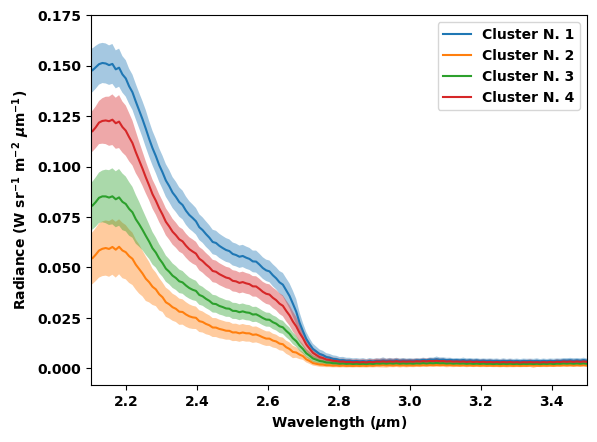

In [5]:
# plot the results 

K=len(mean_spectra[:,0])


for i in range(K):
    plt.plot(wv, mean_spectra[i], label="Cluster N. "+str(int(i+1)))
    plt.fill_between(wv, mean_spectra[i]-mean_std[i], mean_spectra[i]+mean_std[i], alpha=0.4)
plt.xlim(2.1,3.5)
plt.xlabel(r"Wavelength ($\mu$m)", fontweight="bold")
plt.ylabel(r"Radiance (W sr$^{-1}$ m$^{-2}$ $\mu$m$^{-1}$)", fontweight="bold")
plt.legend()
plt.show()

It is possible to note that chopper divided the spectra in the dataset considering their "intensity"

In [6]:
# plot the results using an ancillary file

ancillary_file=pd.read_csv("ganymede_log_20.txt",  header=None, sep='\s+', engine='python')

ancillary1=ancillary_file[1]
ancillary2=ancillary_file[0] 

label_ax="Longitude W (°)"
label_ay="Latitude (°)"

These are the longitude and latitude values associated to the of Ganymede collected by Juno/JIRAM during its PJ24 passage.

They are published in Mura et al. 2020 "Infrared Observations of Ganymede From the Jovian InfraRed Auroral Mapper on Juno"

They are also available at: https://pds-atmospheres.nmsu.edu/data_and_services/atmospheres_data/JUNO/jiram.html

If you wish to use them outside this example you are gently asked to contact the JIRAM PI Alessandro Mura at alessandro.mura@inaf.it

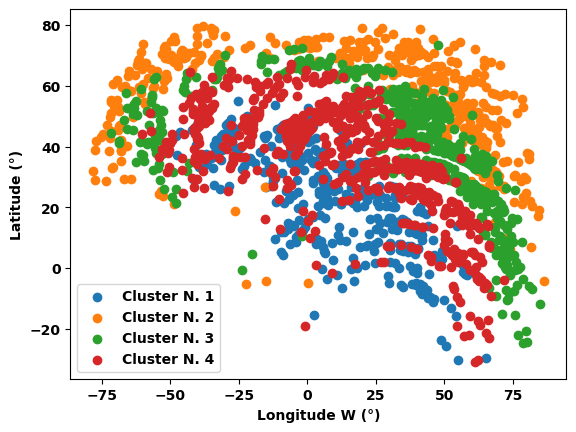

In [7]:
ca1=[]
ca2=[]

for i in range(K):
    ca1.append([])
    ca2.append([])

for i in range(K):
    ca1[i].append([ancillary1[j] for j in clusters[i]])
    ca2[i].append([ancillary2[j] for j in clusters[i]])


for i in range(K):
    plt.scatter(ca1[i], ca2[i], label="Cluster N. "+str(int(i+1)))
#plt.gca().invert_xaxis()
plt.xlabel(label_ax, fontweight="bold")
plt.ylabel(label_ay, fontweight="bold")
plt.legend()
plt.show()

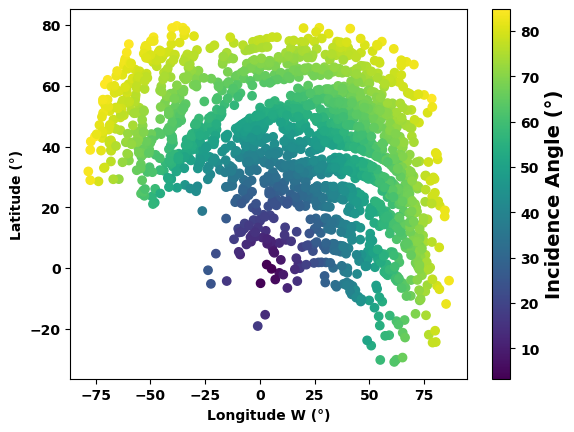

In [8]:
inc=ancillary_file[3].to_numpy()

plt.scatter(ancillary1, ancillary2, c=inc)
cbar=plt.colorbar()
cbar.set_label("Incidence Angle (°)", fontweight="bold", size=14)
plt.xlabel(label_ax, fontweight="bold")
plt.ylabel(label_ay, fontweight="bold")
plt.show()

The clusters obtained by chopper follow the distribution of incidence angles !!!

Therefore chopper found as the main source of variance the differences in viewing conditions.

If we are interested in physics we need to use the first flag

In [9]:
import chopper as chopper

labels, clusters, coefficients, mean_spectra, mean_std= chopper.do_Clustering(input_spectra=spectra, flag_solar_correction=True, flag_PCA=False,
                                                      flag_GMM=False, flag_N_clusters=False, distance_in_au=5.2, incidence_angle=inc, wavelengths=wv)

#########################################################################
################## directly from the ghost crew...... ###################
#########################################################################

ˇ       --~~--_      ˇ 
|____/~/_|  |_\~\____|
    |____________|                    Welcome user :)
    |[][][][][][]|:=  .               I'm here to help you 
  __| __         |__ \  ' .          / with your collection of spectra !
 |  ||. |   ==   |  |  \    ' .     /  
(|  ||__|   ==   |  |)   \      '<
 |  |[] []  ==   |  |      \    '\|
 |  |____________|  |        \    |
 /__\     |_|    /__\          \ / \

#########################################################################
################# chopper.py v1 written by @astro-francy ################
#########################################################################

/~/_|  |_\~\ --- PCA step


/~/_|  |_\~\ --- Clustering step

Based on k-elbow method, a possible optimal number of clusters is: 5

/~/

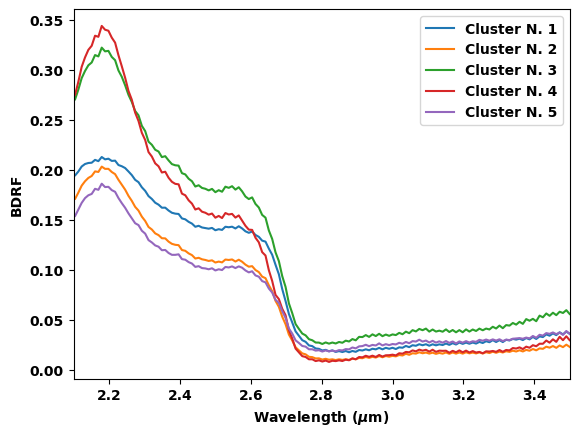

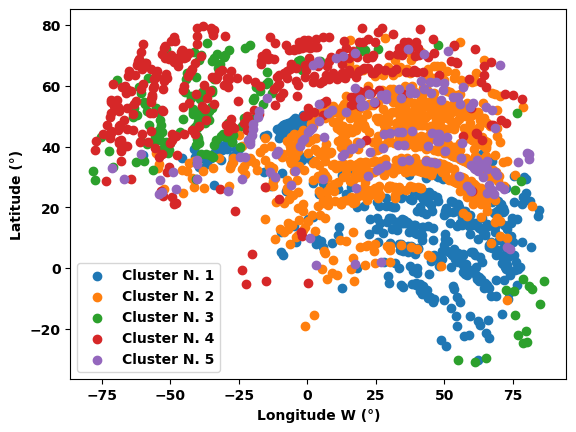

In [ ]:
# plot the results 

K=len(mean_spectra[:,0])


for i in range(K):
    plt.plot(wv, mean_spectra[i], label="Cluster N. "+str(int(i+1)))
    #plt.fill_between(wv, mean_spectra[i]-mean_std[i], mean_spectra[i]+mean_std[i], alpha=0.4)
plt.xlim(2.1,3.5)
plt.xlabel(r"Wavelength ($\mu$m)", fontweight="bold")
plt.ylabel(r"BRDF", fontweight="bold")
plt.legend()
plt.show()

ca1=[]
ca2=[]

for i in range(K):
    ca1.append([])
    ca2.append([])

for i in range(K):
    ca1[i].append([ancillary1[j] for j in clusters[i]])
    ca2[i].append([ancillary2[j] for j in clusters[i]])


for i in range(K):
    plt.scatter(ca1[i], ca2[i], label="Cluster N. "+str(int(i+1)))
#plt.gca().invert_xaxis()
plt.xlabel(label_ax, fontweight="bold")
plt.ylabel(label_ay, fontweight="bold")
plt.legend()
plt.show()

These clusters now are very similar to the results presented in Mura et al. 2020 !